# Data Cleaning

In [16]:
import numpy as np
import pandas as pd

In [17]:
file = "C:/Users/María Moya/Documents/GitHub/PROJECT_EDA_JOAQUINVILLAR_ONLINE_DS_THEBRIDGE/src/data/Hello_Auto_data.xlsx"

In [18]:
df_claims = pd.read_excel(file,sheet_name = "Claims")
df_claims
df_claims.sample(12)

,policyId,claimId,claimDate,claimStatus
2036,2998,634,2021-03-26,Cierre
4757,8204,4617,2022-05-17,Cierre
6113,12109,4263,2022-03-31,Cierre
7122,15174,4817,2022-06-02,Cierre
4261,7101,2361,2021-09-23,Cierre
5723,10772,5572,2022-05-30,Cierre
1659,2354,723,2021-04-12,Cierre
6888,14473,8686,2023-04-16,Cierre
8121,18052,8407,2023-03-20,Cierre
10225,25692,9896,2023-07-06,Cierre


In [19]:
df_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12397 entries, 0 to 12396
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   policyId     12397 non-null  int64         
 1   claimId      12397 non-null  int64         
 2   claimDate    12397 non-null  datetime64[ns]
 3   claimStatus  12397 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 387.5+ KB


| Column          | Description  |
|-----------------|-----------------|
| claimId   | Número de identificación de siniestro| 
| claimDate | Día que se ha originado el siniestro| 
| claimStatus | Estado del siniestro|
| policyId        | Número de identificación de póliza contratada| 

In [20]:
#Duplicados
df_claims.duplicated(keep=False).sum()

np.int64(0)

In [21]:
df_claims.isna().sum()

policyId       0
claimId        0
claimDate      0
claimStatus    0
dtype: int64

In [22]:
df_claims.policyId.value_counts()

policyId
14285    10
2108     10
10567     9
3154      8
1740      8
         ..
41984     1
41999     1
42003     1
42225     1
11        1
Name: count, Length: 8826, dtype: int64

# Análisis Univariante


In [23]:
# Selección
df_tipificacion = pd.DataFrame([df_claims.nunique(), df_claims.nunique()/len(df_claims) * 100, df_claims.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion

,Card,%_Card,Tipo
policyId,8826,71.194644,int64
claimId,12397,100.0,int64
claimDate,1237,9.978221,datetime64[ns]
claimStatus,2,0.016133,object


In [24]:
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
policyId,8826,71.194644,int64,Numerica Continua
claimId,12397,100.0,int64,Numerica Continua
claimDate,1237,9.978221,datetime64[ns],Numerica Discreta
claimStatus,2,0.016133,object,Binaria


In [25]:
df_claims.describe()

,policyId,claimId,claimDate
count,12397.000000,12397.000000,12397
mean,14265.409454,6403.772848,2022-08-31 00:42:51.718964480
min,4.000000,1.000000,2020-02-03 00:00:00
25%,4853.000000,3266.000000,2021-12-05 00:00:00
50%,12318.000000,6418.000000,2022-10-08 00:00:00
75%,22140.000000,9555.000000,2023-05-30 00:00:00
max,44572.000000,12721.000000,2023-12-29 00:00:00
std,10759.236293,3656.127332,NaN


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

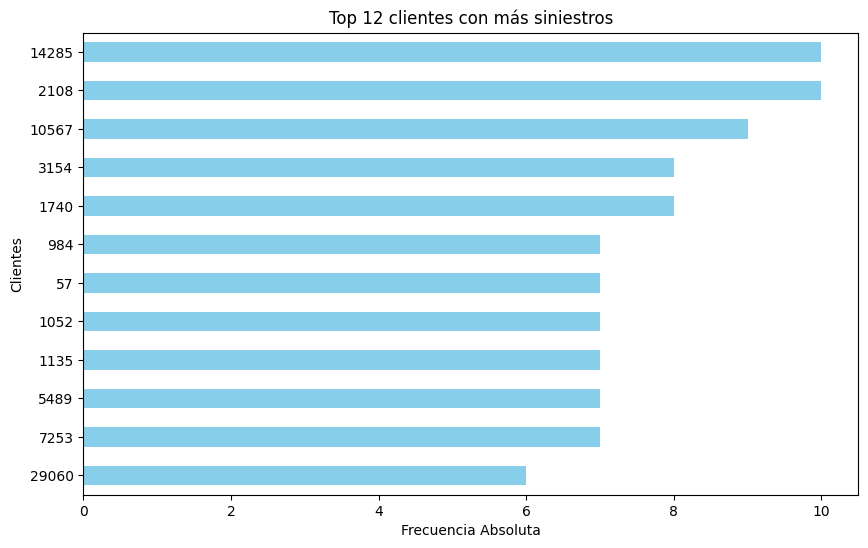

In [27]:
df_claims["policyId"].value_counts(ascending=False).head(12).plot(
    kind="barh", 
    figsize=(10, 6),  # Tamaño opcional de la gráfica
    color="skyblue",  # Color opcional
    title="Top 12 clientes con más siniestros"
)
plt.xlabel("Frecuencia Absoluta")
plt.ylabel("Clientes")
plt.gca().invert_yaxis()  # Invertir eje Y para que el valor más alto esté arriba
plt.show()

In [28]:
# Frecuencia Relativa
(df_claims.policyId.value_counts()/len(df_claims))*100

policyId
14285    0.080665
2108     0.080665
10567    0.072598
3154     0.064532
1740     0.064532
           ...   
41984    0.008066
41999    0.008066
42003    0.008066
42225    0.008066
11       0.008066
Name: count, Length: 8826, dtype: float64

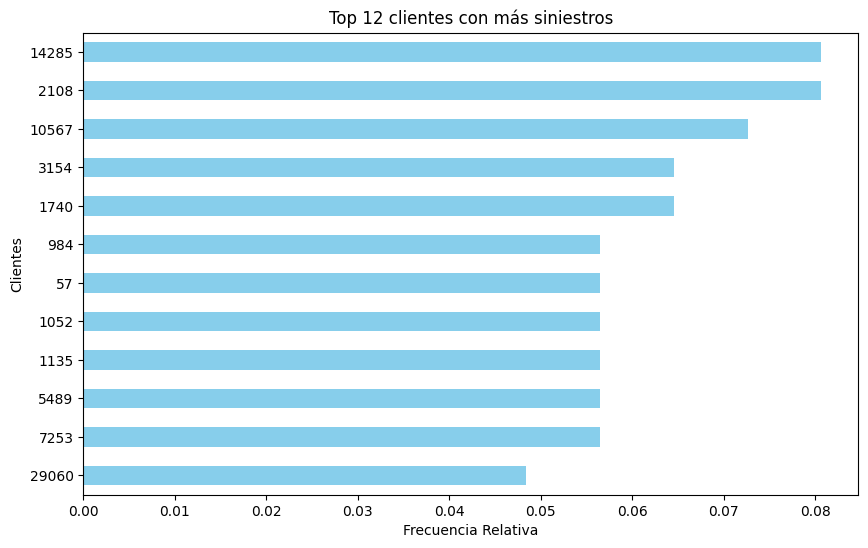

In [29]:
((df_claims.policyId.value_counts(ascending=False)/len(df_claims))*100).head(12).plot(
    kind="barh", 
    figsize=(10, 6),  # Tamaño opcional de la gráfica
    color="skyblue",  # Color opcional
    title="Top 12 clientes con más siniestros"
)
plt.xlabel("Frecuencia Relativa")
plt.ylabel("Clientes")
plt.gca().invert_yaxis()  # Invertir eje Y para que el valor más alto esté arriba
plt.show()

In [30]:
# Percentil
print(df_claims.policyId.value_counts().quantile(0.5),
    df_claims.policyId.value_counts().quantile(0.9), 
    df_claims.policyId.value_counts().quantile(0.95),
    df_claims.policyId.value_counts().max())


1.0 2.0 3.0 10
